In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
from datetime import date
import math
import pandas_ta as pta

import pandas_datareader as web

In [3]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [4]:
#TSLA is the name of the Tesla stocks in yahoo finance
data = web.get_data_yahoo('TSLA', start = datetime.datetime(2010, 6, 29), 
                             end = date.today())
#data = pd.read_csv("TSLA Stocks.csv")

data = data[['Adj Close']]
data.columns = ['Price']
data.head()

,Price
Date,
2010-06-29,4.778
2010-06-30,4.766
2010-07-01,4.392
2010-07-02,3.840
2010-07-06,3.222


In [5]:
print('There are {} number of days in the dataset.'.format(data.shape[0]))

There are 2870 number of days in the dataset.


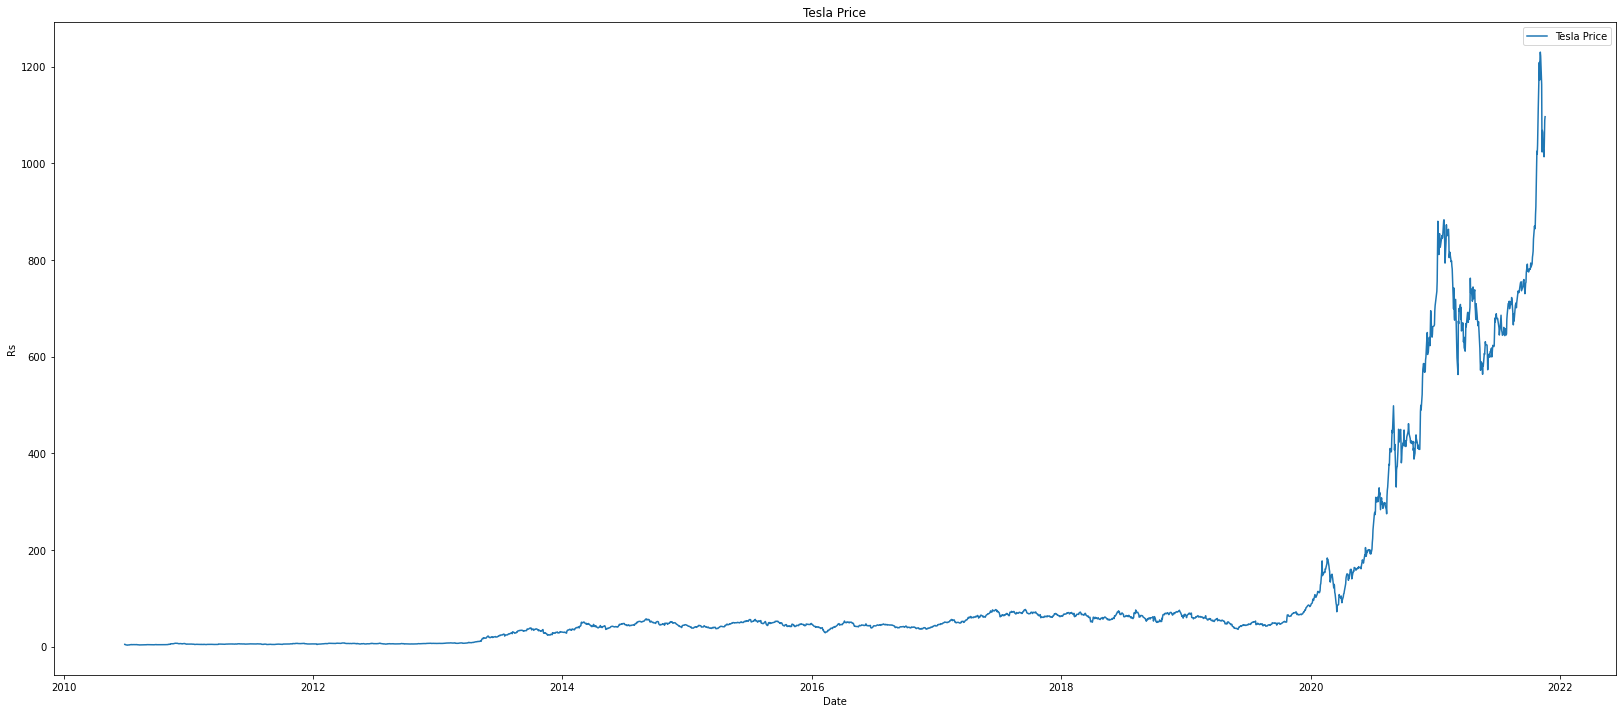

In [6]:
plt.figure(figsize=(28, 12))#, dpi=100)
plt.plot(data.index, data['Price'], label='Tesla Price')
plt.xlabel('Date')
plt.ylabel('Rs')
plt.title('Tesla Price')
plt.legend()
plt.show()

In [7]:
def get_technical_indicators(dataset):
    # Create 7 and 21 days Moving Average
    dataset['ma7'] = dataset['Price'].rolling(window=7).mean()
    dataset['ma21'] = dataset['Price'].rolling(window=21).mean()
    
    # Create MACD
    dataset['26ema'] = dataset['Price'].ewm(span=26).mean()
    dataset['12ema'] = dataset['Price'].ewm(span=12).mean()
    dataset['MACD'] = dataset['12ema']-dataset['26ema']

    # Create Bollinger Bands
    dataset['20sd'] = dataset['Price'].rolling(window = 21).std()
    dataset['upper_band'] = dataset['ma21'] + (dataset['20sd']*2)
    dataset['lower_band'] = dataset['ma21'] - (dataset['20sd']*2)
    
    # Create Exponential moving average
    dataset['ema'] = dataset['Price'].ewm(com=0.5).mean()
    
    # Create Momentum
    dataset['momentum'] = dataset['Price']-1
    dataset['log_momentum'] = np.log(dataset['momentum'])

    #Create RSI
    dataset['RSI'] = pta.rsi(dataset['Price'], length = 14)
    return dataset

In [8]:
df = get_technical_indicators(data)
df

,Price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum,RSI
Date,,,,,,,,,,,,,
2010-06-29,4.778000,NaN,NaN,4.778000,4.778000,0.000000,NaN,NaN,NaN,4.778000,3.778000,1.329195,NaN
2010-06-30,4.766000,NaN,NaN,4.771769,4.771500,-0.000269,NaN,NaN,NaN,4.769000,3.766000,1.326013,NaN
2010-07-01,4.392000,NaN,NaN,4.635322,4.623381,-0.011941,NaN,NaN,NaN,4.508000,3.392000,1.221420,NaN
2010-07-02,3.840000,NaN,NaN,4.412985,4.376098,-0.036886,NaN,NaN,NaN,4.057100,2.840000,1.043804,NaN
2010-07-06,3.222000,NaN,NaN,4.136790,4.062534,-0.074256,NaN,NaN,NaN,3.498066,2.222000,0.798408,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-12,1033.420044,1114.759992,1043.659520,1016.424694,1082.300038,65.875343,129.713473,1303.086465,784.232574,1044.258925,1032.420044,6.939661,52.451477
2021-11-15,1013.390015,1083.828561,1051.771900,1016.199903,1071.698496,55.498593,121.612854,1294.997608,808.546192,1023.679651,1012.390015,6.920069,50.177317
2021-11-16,1054.729980,1059.919992,1060.563328,1019.053983,1069.087955,50.033972,114.275621,1289.114570,832.012086,1044.379871,1053.729980,6.960092,54.556640


In [9]:
df = df.dropna()
df.head()

,Price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum,RSI
Date,,,,,,,,,,,,,
2010-07-28,4.144,4.143714,3.982381,4.022546,4.081642,0.059096,0.449192,4.880765,3.083997,4.142836,3.144,1.145496,48.821734
2010-07-29,4.070,4.145143,3.948667,4.026854,4.079805,0.052951,0.411477,4.771621,3.125713,4.094279,3.070,1.121678,46.588921
2010-07-30,3.988,4.137143,3.911619,4.023385,4.065371,0.041986,0.366808,4.645234,3.178004,4.023426,2.988,1.094604,44.177836
2010-08-02,4.184,4.134857,3.901714,4.037510,4.083959,0.046449,0.355832,4.613377,3.190051,4.130475,3.184,1.158138,50.740039
2010-08-03,4.390,4.153714,3.927905,4.068085,4.131777,0.063692,0.370981,4.669866,3.185944,4.303492,3.390,1.220830,56.524735


In [10]:
def plot_technical_indicators(dataset, last_days):
    plt.figure(figsize=(16, 10), dpi=100)
    shape_0 = dataset.shape[0]
    xmacd_ = shape_0-last_days
    
    dataset = dataset.iloc[-last_days:, :]
    x_ = range(3, dataset.shape[0])
    x_ =list(dataset.index)

    plt.figure(figsize=(30,20))
    # Plot first subplot
    plt.subplot(2, 1, 1)
    plt.plot(dataset['ma7'],label='MA 7', color='g',linestyle='--')
    plt.plot(dataset['Price'],label='Closing Price', color='b')
    plt.plot(dataset['ma21'],label='MA 21', color='r',linestyle='--')
    plt.plot(dataset['upper_band'],label='Upper Band', color='c')
    plt.plot(dataset['lower_band'],label='Lower Band', color='c')
    plt.plot(dataset['RSI'],label='RSI',  linestyle='-.')

    plt.fill_between(x_, dataset['lower_band'], dataset['upper_band'], alpha=0.35)
    plt.title('Technical indicators - last {} days.'.format(last_days))
    plt.ylabel('USD')
    plt.legend()

    # Plot second subplot

    plt.subplot(2, 1, 2)
    plt.title('MACD')
    plt.plot(dataset['MACD'],label='MACD', linestyle='-.')
#     plt.hlines(15, xmacd_, shape_0, colors='g', linestyles='--')
#     plt.hlines(-15, xmacd_, shape_0, colors='g', linestyles='--')
    plt.plot(dataset['log_momentum'],label='Momentum', color='b',linestyle='-')

    plt.legend()
    plt.show()

<Figure size 1600x1000 with 0 Axes>

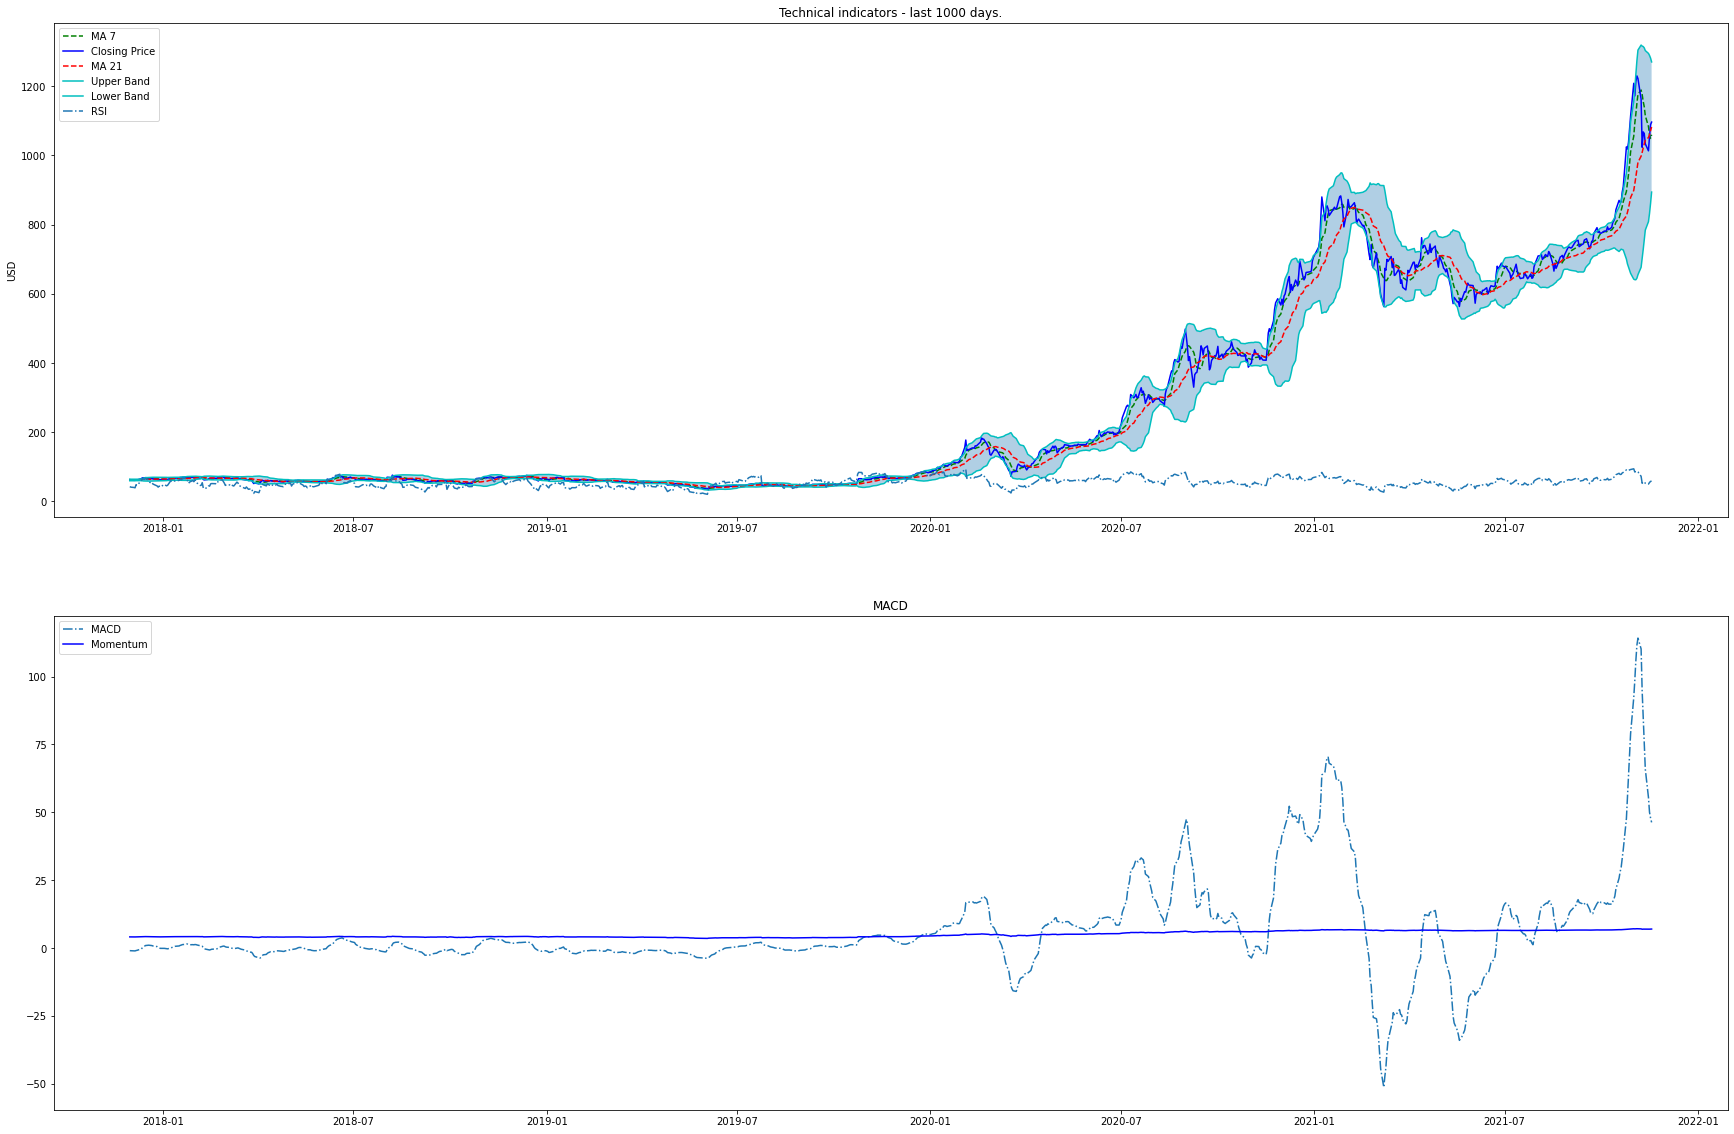

In [11]:
plot_technical_indicators(df, 1000)

Text(0.5, 1.0, 'Params')

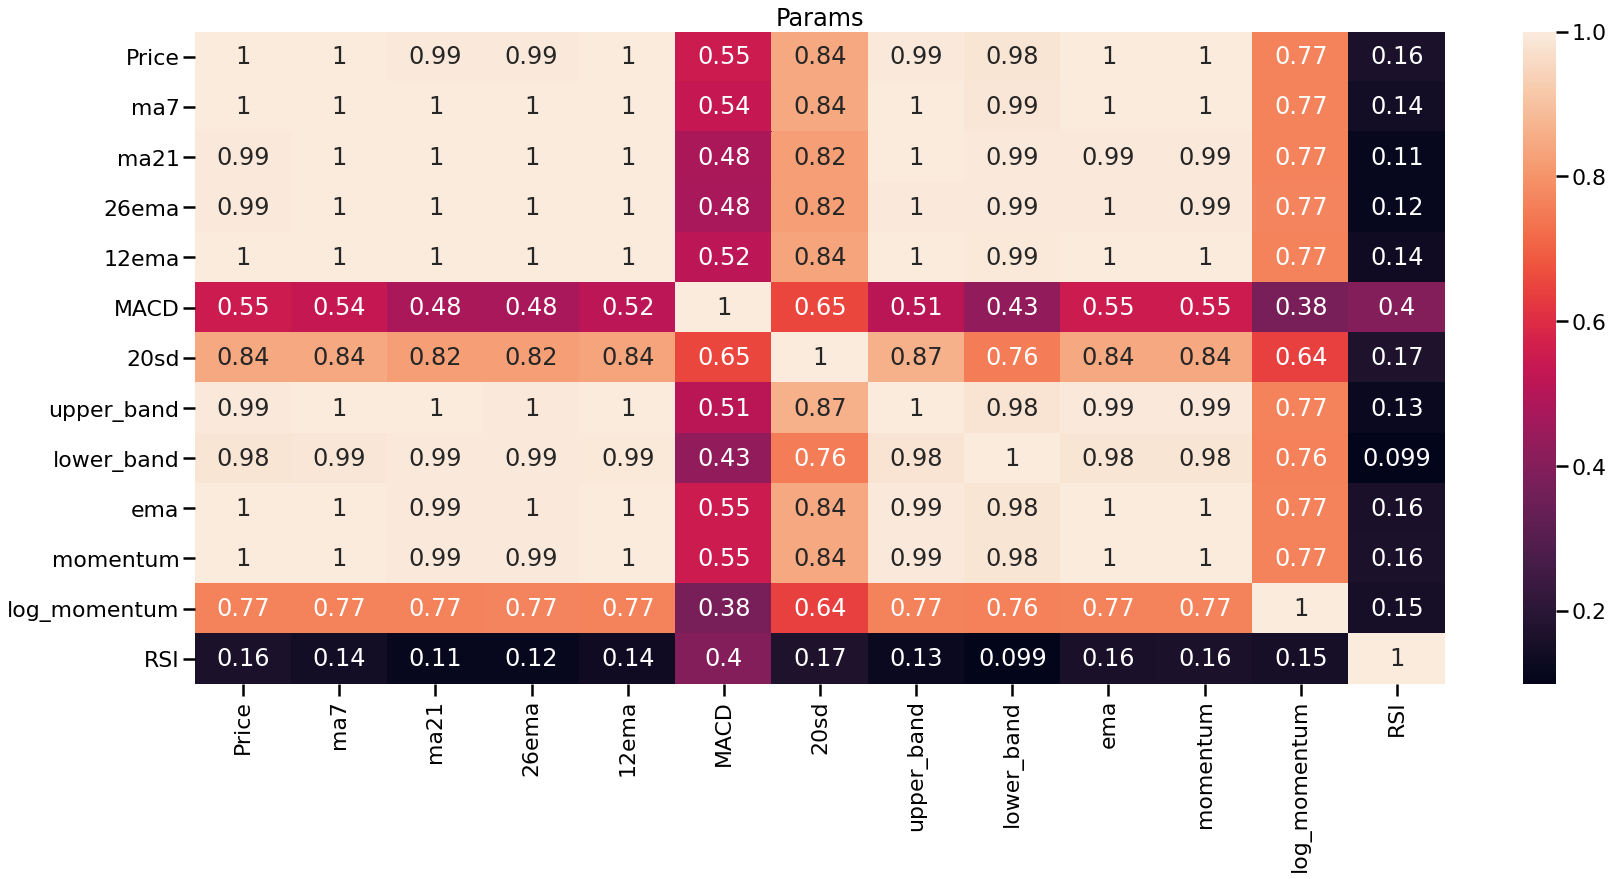

In [12]:
plt.figure(figsize = (28,12))
sns.set_context('poster',font_scale=1)
sns.heatmap(df.corr(), annot = True).set_title('Params')


In [13]:
print('Total dataset has {} samples, and {} features.'.format(df.shape[0], \
                                                              df.shape[1]))

Total dataset has 2850 samples, and 13 features.


In [14]:
df.columns

Index(['Price', 'ma7', 'ma21', '26ema', '12ema', 'MACD', '20sd', 'upper_band',
       'lower_band', 'ema', 'momentum', 'log_momentum', 'RSI'],
      dtype='object')

In [15]:
df

,Price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum,RSI
Date,,,,,,,,,,,,,
2010-07-28,4.144000,4.143714,3.982381,4.022546,4.081642,0.059096,0.449192,4.880765,3.083997,4.142836,3.144000,1.145496,48.821734
2010-07-29,4.070000,4.145143,3.948667,4.026854,4.079805,0.052951,0.411477,4.771621,3.125713,4.094279,3.070000,1.121678,46.588921
2010-07-30,3.988000,4.137143,3.911619,4.023385,4.065371,0.041986,0.366808,4.645234,3.178004,4.023426,2.988000,1.094604,44.177836
2010-08-02,4.184000,4.134857,3.901714,4.037510,4.083959,0.046449,0.355832,4.613377,3.190051,4.130475,3.184000,1.158138,50.740039
2010-08-03,4.390000,4.153714,3.927905,4.068085,4.131777,0.063692,0.370981,4.669866,3.185944,4.303492,3.390000,1.220830,56.524735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-12,1033.420044,1114.759992,1043.659520,1016.424694,1082.300038,65.875343,129.713473,1303.086465,784.232574,1044.258925,1032.420044,6.939661,52.451477
2021-11-15,1013.390015,1083.828561,1051.771900,1016.199903,1071.698496,55.498593,121.612854,1294.997608,808.546192,1023.679651,1012.390015,6.920069,50.177317
2021-11-16,1054.729980,1059.919992,1060.563328,1019.053983,1069.087955,50.033972,114.275621,1289.114570,832.012086,1044.379871,1053.729980,6.960092,54.556640


In [16]:
data_training = df[df.index < '2019-01-31'].copy()
data_training

,Price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum,RSI
Date,,,,,,,,,,,,,
2010-07-28,4.144000,4.143714,3.982381,4.022546,4.081642,0.059096,0.449192,4.880765,3.083997,4.142836,3.144000,1.145496,48.821734
2010-07-29,4.070000,4.145143,3.948667,4.026854,4.079805,0.052951,0.411477,4.771621,3.125713,4.094279,3.070000,1.121678,46.588921
2010-07-30,3.988000,4.137143,3.911619,4.023385,4.065371,0.041986,0.366808,4.645234,3.178004,4.023426,2.988000,1.094604,44.177836
2010-08-02,4.184000,4.134857,3.901714,4.037510,4.083959,0.046449,0.355832,4.613377,3.190051,4.130475,3.184000,1.158138,50.740039
2010-08-03,4.390000,4.153714,3.927905,4.068085,4.131777,0.063692,0.370981,4.669866,3.185944,4.303492,3.390000,1.220830,56.524735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-24,58.301998,63.373428,64.628476,65.097736,63.382712,-1.715024,4.077850,72.784175,56.472777,58.426361,57.301998,4.048335,37.264506
2019-01-25,59.408001,62.019428,64.644190,64.676274,62.771218,-1.905056,4.055968,72.756127,56.532254,59.080788,58.408001,4.067453,39.740164
2019-01-28,59.276001,60.600286,64.361238,64.276254,62.233492,-2.042762,4.217964,72.797166,55.925310,59.210930,58.276001,4.065190,39.539619


In [17]:
data_testing = df[df.index >= '2019-01-31'].copy()
data_testing

,Price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum,RSI
Date,,,,,,,,,,,,,
2019-01-31,61.403999,59.593429,63.698857,63.586669,61.741483,-1.845186,4.323878,72.346613,55.051101,61.258923,60.403999,4.101055,44.815969
2019-02-01,62.442001,60.296858,63.718762,63.501879,61.849255,-1.652624,4.316738,72.352239,55.085285,62.047642,61.442001,4.118094,47.313691
2019-02-04,62.577999,60.907715,63.838095,63.433443,61.961370,-1.472074,4.244927,72.327948,55.348242,62.401213,61.577999,4.120305,47.648026
2019-02-05,64.269997,61.602286,63.872952,63.495410,62.316543,-1.178867,4.245344,72.363641,55.382264,63.647069,63.269997,4.147411,51.750360
2019-02-06,63.444000,62.197714,63.704000,63.491602,62.489998,-1.001604,4.185183,72.074366,55.333635,63.511690,62.444000,4.134270,49.702776
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-12,1033.420044,1114.759992,1043.659520,1016.424694,1082.300038,65.875343,129.713473,1303.086465,784.232574,1044.258925,1032.420044,6.939661,52.451477
2021-11-15,1013.390015,1083.828561,1051.771900,1016.199903,1071.698496,55.498593,121.612854,1294.997608,808.546192,1023.679651,1012.390015,6.920069,50.177317
2021-11-16,1054.729980,1059.919992,1060.563328,1019.053983,1069.087955,50.033972,114.275621,1289.114570,832.012086,1044.379871,1053.729980,6.960092,54.556640


In [18]:
scalar = MinMaxScaler()

data_training_scaled = scalar.fit_transform(data_training)
print(data_training_scaled.shape)
data_training_scaled

(2142, 13)


array([[8.49210768e-03, 6.27775527e-03, 1.57654499e-03, ...,
        8.49210768e-03, 6.49460318e-02, 4.36564420e-01],
       [7.48503253e-03, 6.29772314e-03, 1.09250618e-03, ...,
        7.48503253e-03, 5.79539717e-02, 4.04287933e-01],
       [6.36907914e-03, 6.18590516e-03, 5.60610277e-04, ...,
        6.36907914e-03, 5.00063476e-02, 3.69434436e-01],
       ...,
       [7.58791521e-01, 7.95381934e-01, 8.68441198e-01, ...,
        7.58791521e-01, 9.22047565e-01, 3.02386580e-01],
       [7.61731091e-01, 7.75474428e-01, 8.65888370e-01, ...,
        7.61731091e-01, 9.23133626e-01, 3.10090395e-01],
       [7.92514992e-01, 7.78074189e-01, 8.62456342e-01, ...,
        7.92514992e-01, 9.34272106e-01, 3.88420011e-01]])

In [19]:
X_train = []
y_train = []

In [20]:
for i in range(60, data_training.shape[0]):
    X_train.append(data_training_scaled[i-60: i])
    y_train.append(data_training_scaled[i, 0])

In [21]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape, y_train.shape

((2082, 60, 13), (2082,))

In [22]:
regressor = Sequential()

regressor.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 13)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.4))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.5))

regressor.add(Dense(units = 1))

In [23]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            12800     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 60)            26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [24]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [25]:
regressor.fit(X_train, y_train, epochs=10, batch_size = 64)

Epoch 1/10
33/33 [==============================] - 10s 165ms/step - loss: 0.0442
Epoch 2/10
33/33 [==============================] - 5s 152ms/step - loss: 0.0105
Epoch 3/10
33/33 [==============================] - 5s 139ms/step - loss: 0.0086
Epoch 4/10
33/33 [==============================] - 4s 134ms/step - loss: 0.0089
Epoch 5/10
33/33 [==============================] - 4s 136ms/step - loss: 0.0088
Epoch 6/10
33/33 [==============================] - 4s 135ms/step - loss: 0.0078
Epoch 7/10
33/33 [==============================] - 5s 139ms/step - loss: 0.0078
Epoch 8/10
33/33 [==============================] - 5s 145ms/step - loss: 0.0073
Epoch 9/10
33/33 [==============================] - 5s 137ms/step - loss: 0.0068
Epoch 10/10
33/33 [==============================] - 5s 141ms/step - loss: 0.0076


In [26]:
past_60 = data_training.tail(60)

dt = past_60.append(data_testing, ignore_index = True)
dt

,Price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum,RSI
0,68.856003,65.160286,57.072381,59.737488,62.404422,2.666934,6.504731,70.081843,44.062920,68.233109,67.856003,4.217388,67.313187
1,69.281998,66.814857,57.687429,60.444489,63.462510,3.018022,7.024465,71.736359,43.638498,68.932368,68.281998,4.223646,67.830036
2,68.279999,67.573143,58.444095,61.024897,64.203662,3.178766,7.276602,72.997298,43.890892,68.497455,67.279999,4.208863,65.217844
3,68.211998,67.863428,59.306000,61.557275,64.820329,3.263055,7.312203,73.930406,44.681594,68.307150,67.211998,4.207852,65.034798
4,69.632004,68.243714,60.118952,62.155403,65.560587,3.405184,7.471965,75.062883,45.175022,69.190386,68.632004,4.228759,67.110711
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,1033.420044,1114.759992,1043.659520,1016.424694,1082.300038,65.875343,129.713473,1303.086465,784.232574,1044.258925,1032.420044,6.939661,52.451477
764,1013.390015,1083.828561,1051.771900,1016.199903,1071.698496,55.498593,121.612854,1294.997608,808.546192,1023.679651,1012.390015,6.920069,50.177317
765,1054.729980,1059.919992,1060.563328,1019.053983,1069.087955,50.033972,114.275621,1289.114570,832.012086,1044.379871,1053.729980,6.960092,54.556640
766,1089.010010,1049.358573,1071.265233,1024.235911,1072.152886,47.916976,105.131193,1281.527619,861.002846,1074.133297,1088.010010,6.992106,57.864054


In [27]:
inputs = scalar.fit_transform(dt)
print(inputs.shape)
inputs

(768, 13)


array([[0.02768743, 0.023956  , 0.0161559 , ..., 0.02768743, 0.18739081,
        0.63540124],
       [0.02804417, 0.0253929 , 0.01674616, ..., 0.02804417, 0.18914657,
        0.64241049],
       [0.02720506, 0.02605144, 0.01747232, ..., 0.02720506, 0.18499917,
        0.60698522],
       ...,
       [0.85329729, 0.88785244, 0.97919218, ..., 0.85329729, 0.95685396,
        0.46240322],
       [0.88200475, 0.8786804 , 0.98946265, ..., 0.88200475, 0.96583549,
        0.50725673],
       [0.88817667, 0.88772218, 1.        , ..., 0.88817667, 0.96772947,
        0.51672634]])

In [28]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])
    
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((708, 60, 13), (708,))

In [29]:
y_pred = regressor.predict(X_test)

In [30]:
y_pred

array([[0.04221466],
       [0.04208702],
       [0.04195724],
       [0.0418348 ],
       [0.04172901],
       [0.04164526],
       [0.04158225],
       [0.04153501],
       [0.04150114],
       [0.04147898],
       [0.04146448],
       [0.04145129],
       [0.04143647],
       [0.04141735],
       [0.04139175],
       [0.04135494],
       [0.04130489],
       [0.04124332],
       [0.04117185],
       [0.04110089],
       [0.04104239],
       [0.04099685],
       [0.04095811],
       [0.04091814],
       [0.0408704 ],
       [0.04081088],
       [0.04074015],
       [0.04066301],
       [0.04058315],
       [0.04050522],
       [0.04043326],
       [0.0403662 ],
       [0.04030059],
       [0.04023324],
       [0.04016369],
       [0.04009194],
       [0.04001772],
       [0.03994024],
       [0.03986094],
       [0.03978448],
       [0.03971631],
       [0.03966141],
       [0.03962659],
       [0.03961531],
       [0.03963067],
       [0.03966487],
       [0.03970966],
       [0.039

In [31]:
scale = 1/scalar.scale_[0]

In [32]:
y_pred = y_pred*scale
y_test = y_test*scale

In [33]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

72.60536750734087

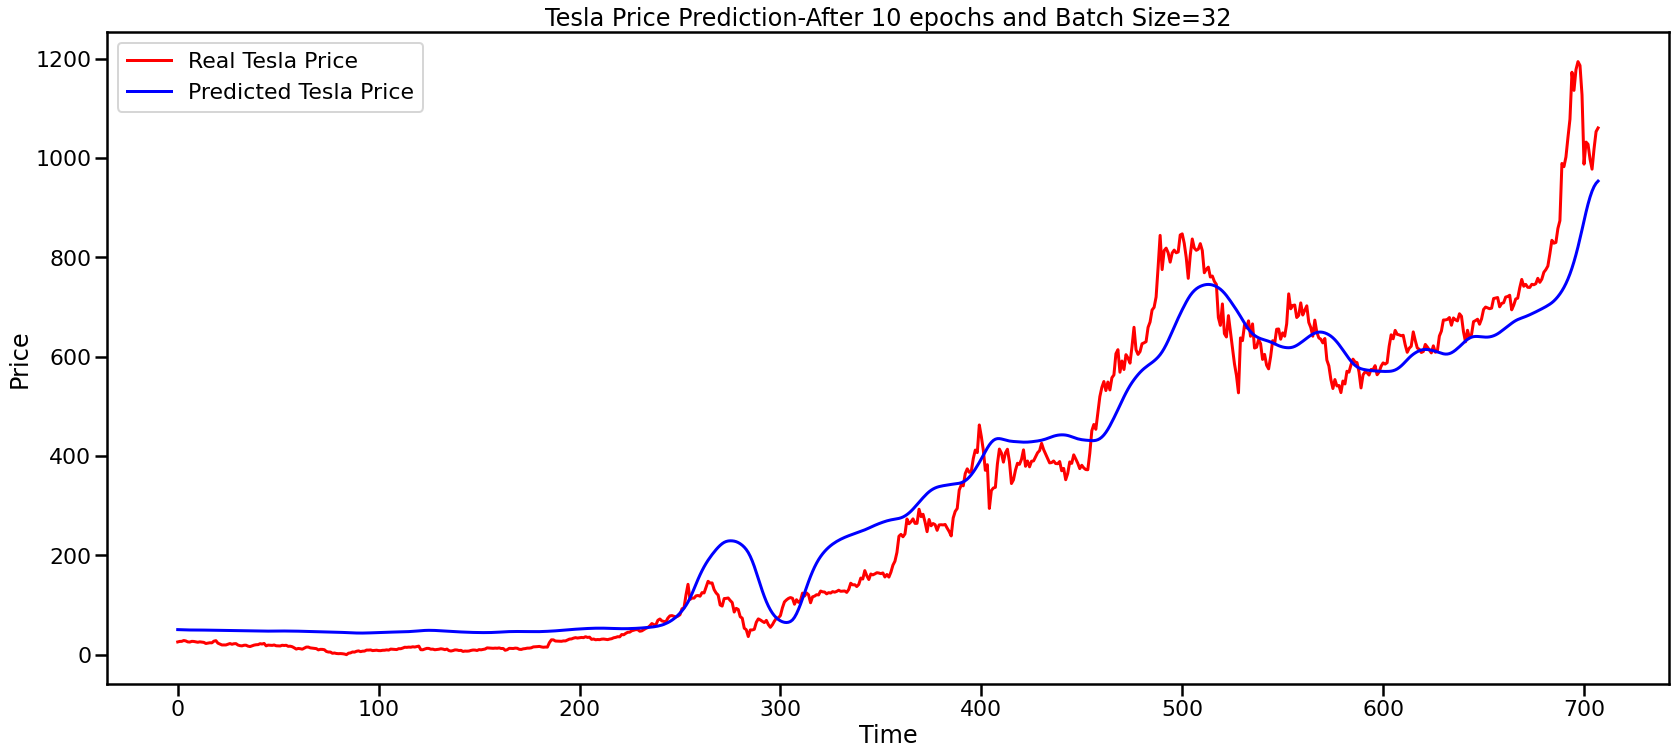

In [34]:
# Visualising the results
plt.figure(figsize=(28,12))
plt.plot(y_test, color = 'red', label = 'Real Tesla Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Tesla Price')
plt.title('Tesla Price Prediction-After 10 epochs and Batch Size=32')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [35]:
regressor.fit(X_train, y_train, epochs=25, batch_size = 64)

Epoch 1/25
33/33 [==============================] - 5s 158ms/step - loss: 0.0069
Epoch 2/25
33/33 [==============================] - 5s 143ms/step - loss: 0.0066
Epoch 3/25
33/33 [==============================] - 5s 151ms/step - loss: 0.0059
Epoch 4/25
33/33 [==============================] - 5s 147ms/step - loss: 0.0060
Epoch 5/25
33/33 [==============================] - 5s 150ms/step - loss: 0.0063
Epoch 6/25
33/33 [==============================] - 5s 146ms/step - loss: 0.0063
Epoch 7/25
33/33 [==============================] - 5s 152ms/step - loss: 0.0061
Epoch 8/25
33/33 [==============================] - 5s 146ms/step - loss: 0.0054
Epoch 9/25
33/33 [==============================] - 4s 134ms/step - loss: 0.0057
Epoch 10/25
33/33 [==============================] - 5s 139ms/step - loss: 0.0057
Epoch 11/25
33/33 [==============================] - 5s 143ms/step - loss: 0.0063
Epoch 12/25
33/33 [==============================] - 5s 137ms/step - loss: 0.0053
Epoch 13/25
33/33 [======

In [36]:
past_60 = data_training.tail(60)

dt = past_60.append(data_testing, ignore_index = True)
dt

,Price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum,RSI
0,68.856003,65.160286,57.072381,59.737488,62.404422,2.666934,6.504731,70.081843,44.062920,68.233109,67.856003,4.217388,67.313187
1,69.281998,66.814857,57.687429,60.444489,63.462510,3.018022,7.024465,71.736359,43.638498,68.932368,68.281998,4.223646,67.830036
2,68.279999,67.573143,58.444095,61.024897,64.203662,3.178766,7.276602,72.997298,43.890892,68.497455,67.279999,4.208863,65.217844
3,68.211998,67.863428,59.306000,61.557275,64.820329,3.263055,7.312203,73.930406,44.681594,68.307150,67.211998,4.207852,65.034798
4,69.632004,68.243714,60.118952,62.155403,65.560587,3.405184,7.471965,75.062883,45.175022,69.190386,68.632004,4.228759,67.110711
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,1033.420044,1114.759992,1043.659520,1016.424694,1082.300038,65.875343,129.713473,1303.086465,784.232574,1044.258925,1032.420044,6.939661,52.451477
764,1013.390015,1083.828561,1051.771900,1016.199903,1071.698496,55.498593,121.612854,1294.997608,808.546192,1023.679651,1012.390015,6.920069,50.177317
765,1054.729980,1059.919992,1060.563328,1019.053983,1069.087955,50.033972,114.275621,1289.114570,832.012086,1044.379871,1053.729980,6.960092,54.556640
766,1089.010010,1049.358573,1071.265233,1024.235911,1072.152886,47.916976,105.131193,1281.527619,861.002846,1074.133297,1088.010010,6.992106,57.864054


In [37]:
inputs = scalar.fit_transform(dt)
print(inputs.shape)
inputs

(768, 13)


array([[0.02768743, 0.023956  , 0.0161559 , ..., 0.02768743, 0.18739081,
        0.63540124],
       [0.02804417, 0.0253929 , 0.01674616, ..., 0.02804417, 0.18914657,
        0.64241049],
       [0.02720506, 0.02605144, 0.01747232, ..., 0.02720506, 0.18499917,
        0.60698522],
       ...,
       [0.85329729, 0.88785244, 0.97919218, ..., 0.85329729, 0.95685396,
        0.46240322],
       [0.88200475, 0.8786804 , 0.98946265, ..., 0.88200475, 0.96583549,
        0.50725673],
       [0.88817667, 0.88772218, 1.        , ..., 0.88817667, 0.96772947,
        0.51672634]])

In [38]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])
    
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((708, 60, 13), (708,))

In [39]:
y_pred = regressor.predict(X_test)

In [40]:
y_pred

array([[0.05429943],
       [0.05400761],
       [0.05372079],
       [0.05345965],
       [0.05324499],
       [0.05308826],
       [0.05298421],
       [0.05291922],
       [0.05288353],
       [0.05287164],
       [0.05287381],
       [0.05287747],
       [0.05287535],
       [0.05286214],
       [0.05283133],
       [0.05277115],
       [0.05267464],
       [0.05254573],
       [0.05238998],
       [0.05223246],
       [0.05210444],
       [0.05201167],
       [0.05193986],
       [0.0518664 ],
       [0.05177158],
       [0.05164307],
       [0.05148159],
       [0.05130011],
       [0.05110928],
       [0.05092186],
       [0.05074886],
       [0.05058932],
       [0.0504342 ],
       [0.05027281],
       [0.05010195],
       [0.04992387],
       [0.04973722],
       [0.04953854],
       [0.04933032],
       [0.0491255 ],
       [0.0489412 ],
       [0.04879273],
       [0.04869883],
       [0.04866953],
       [0.04871103],
       [0.0488043 ],
       [0.04892664],
       [0.049

In [41]:
scale = 1/scalar.scale_[0]

In [42]:
y_pred = y_pred*scale
y_test = y_test*scale

In [43]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

78.23886559298573

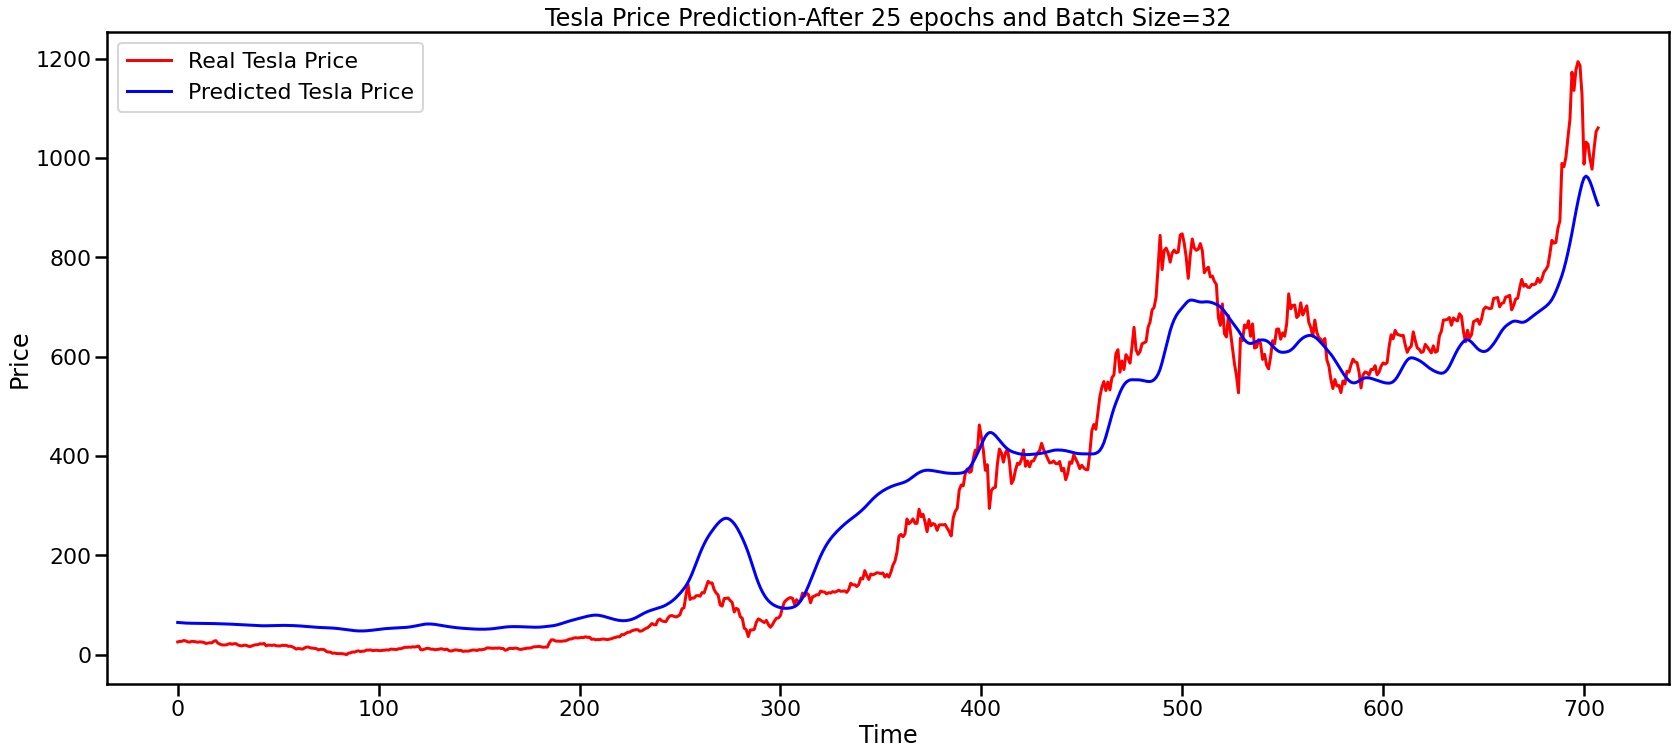

In [44]:
# Visualising the results
plt.figure(figsize=(28,12))
plt.plot(y_test, color = 'red', label = 'Real Tesla Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Tesla Price')
plt.title('Tesla Price Prediction-After 25 epochs and Batch Size=32')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [45]:
regressor.fit(X_train, y_train, epochs=50, batch_size = 64)

Epoch 1/50
33/33 [==============================] - 6s 172ms/step - loss: 0.0043
Epoch 2/50
33/33 [==============================] - 5s 154ms/step - loss: 0.0044
Epoch 3/50
33/33 [==============================] - 5s 149ms/step - loss: 0.0044
Epoch 4/50
33/33 [==============================] - 5s 149ms/step - loss: 0.0041
Epoch 5/50
33/33 [==============================] - 5s 155ms/step - loss: 0.0042
Epoch 6/50
33/33 [==============================] - 5s 145ms/step - loss: 0.0045
Epoch 7/50
33/33 [==============================] - 4s 135ms/step - loss: 0.0044
Epoch 8/50
33/33 [==============================] - 5s 152ms/step - loss: 0.0041
Epoch 9/50
33/33 [==============================] - 5s 146ms/step - loss: 0.0038
Epoch 10/50
33/33 [==============================] - 5s 153ms/step - loss: 0.0037
Epoch 11/50
33/33 [==============================] - 5s 157ms/step - loss: 0.0037
Epoch 12/50
33/33 [==============================] - 6s 168ms/step - loss: 0.0039
Epoch 13/50
33/33 [======

In [46]:
past_60 = data_training.tail(60)

dt = past_60.append(data_testing, ignore_index = True)
dt

,Price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum,RSI
0,68.856003,65.160286,57.072381,59.737488,62.404422,2.666934,6.504731,70.081843,44.062920,68.233109,67.856003,4.217388,67.313187
1,69.281998,66.814857,57.687429,60.444489,63.462510,3.018022,7.024465,71.736359,43.638498,68.932368,68.281998,4.223646,67.830036
2,68.279999,67.573143,58.444095,61.024897,64.203662,3.178766,7.276602,72.997298,43.890892,68.497455,67.279999,4.208863,65.217844
3,68.211998,67.863428,59.306000,61.557275,64.820329,3.263055,7.312203,73.930406,44.681594,68.307150,67.211998,4.207852,65.034798
4,69.632004,68.243714,60.118952,62.155403,65.560587,3.405184,7.471965,75.062883,45.175022,69.190386,68.632004,4.228759,67.110711
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,1033.420044,1114.759992,1043.659520,1016.424694,1082.300038,65.875343,129.713473,1303.086465,784.232574,1044.258925,1032.420044,6.939661,52.451477
764,1013.390015,1083.828561,1051.771900,1016.199903,1071.698496,55.498593,121.612854,1294.997608,808.546192,1023.679651,1012.390015,6.920069,50.177317
765,1054.729980,1059.919992,1060.563328,1019.053983,1069.087955,50.033972,114.275621,1289.114570,832.012086,1044.379871,1053.729980,6.960092,54.556640
766,1089.010010,1049.358573,1071.265233,1024.235911,1072.152886,47.916976,105.131193,1281.527619,861.002846,1074.133297,1088.010010,6.992106,57.864054


In [47]:
inputs = scalar.fit_transform(dt)
print(inputs.shape)
inputs

(768, 13)


array([[0.02768743, 0.023956  , 0.0161559 , ..., 0.02768743, 0.18739081,
        0.63540124],
       [0.02804417, 0.0253929 , 0.01674616, ..., 0.02804417, 0.18914657,
        0.64241049],
       [0.02720506, 0.02605144, 0.01747232, ..., 0.02720506, 0.18499917,
        0.60698522],
       ...,
       [0.85329729, 0.88785244, 0.97919218, ..., 0.85329729, 0.95685396,
        0.46240322],
       [0.88200475, 0.8786804 , 0.98946265, ..., 0.88200475, 0.96583549,
        0.50725673],
       [0.88817667, 0.88772218, 1.        , ..., 0.88817667, 0.96772947,
        0.51672634]])

In [48]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])
    
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((708, 60, 13), (708,))

In [49]:
y_pred = regressor.predict(X_test)

In [50]:
y_pred

array([[0.04916352],
       [0.0487127 ],
       [0.04824856],
       [0.04780981],
       [0.0474306 ],
       [0.04713783],
       [0.04693553],
       [0.0468072 ],
       [0.04673344],
       [0.04670408],
       [0.04670539],
       [0.04671857],
       [0.04672781],
       [0.04672426],
       [0.04669884],
       [0.04663667],
       [0.04652107],
       [0.04635078],
       [0.04613435],
       [0.04589984],
       [0.04569766],
       [0.04555872],
       [0.04546699],
       [0.0453901 ],
       [0.04529181],
       [0.04514435],
       [0.04493657],
       [0.04467949],
       [0.04439488],
       [0.04409954],
       [0.04381493],
       [0.04355142],
       [0.04329851],
       [0.04304013],
       [0.04276562],
       [0.04247585],
       [0.04217213],
       [0.04185101],
       [0.0415099 ],
       [0.04116297],
       [0.04083624],
       [0.04055801],
       [0.04035559],
       [0.04025584],
       [0.04026905],
       [0.04038829],
       [0.04057407],
       [0.040

In [51]:
scale = 1/scalar.scale_[0]

In [52]:
y_pred = y_pred*scale
y_test = y_test*scale

In [53]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

63.57137162956009

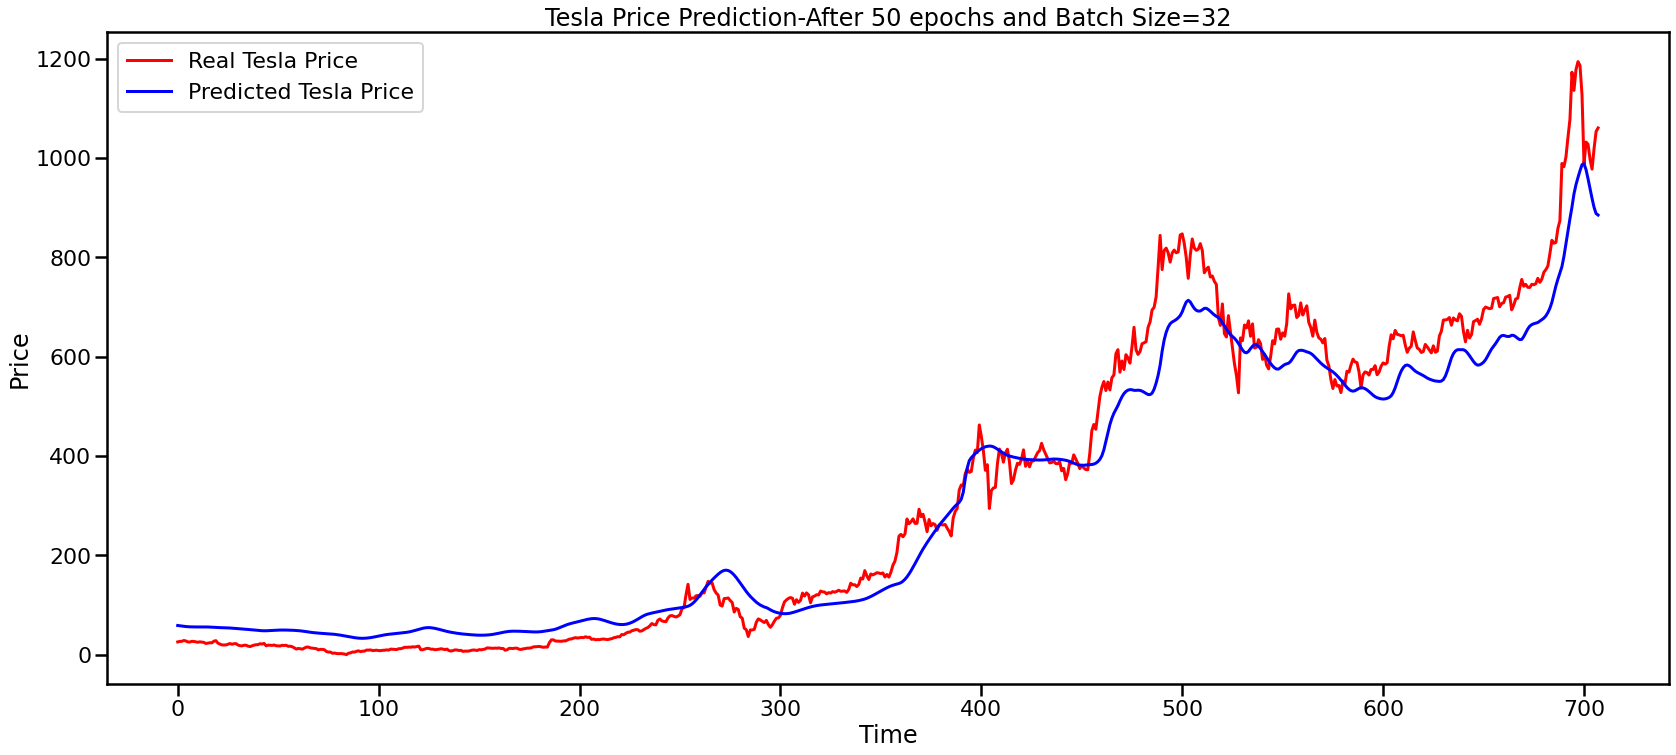

In [54]:
# Visualising the results
plt.figure(figsize=(28,12))
plt.plot(y_test, color = 'red', label = 'Real Tesla Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Tesla Price')
plt.title('Tesla Price Prediction-After 50 epochs and Batch Size=32')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()